In [4]:
# 4.1 Loading the IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
  num_words=10000
)

In [5]:
# 4.2 Decoding review back into text
word_index = imdb.get_word_index()
reverse_word_index = dict(
  [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
  [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
# 4.3 Encoding the integer sequences via multi-hot encoding
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [7]:
# 4.4 Model definition 
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid"),
])

In [8]:
# 4.5 Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [9]:
# 4.6 Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_val = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_val = y_train[10000:]


In [10]:
# 4.7 training your model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5308 - accuracy: 0.7973 - val_loss: 0.3744 - val_accuracy: 0.8978
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3283 - accuracy: 0.9027 - val_loss: 0.2573 - val_accuracy: 0.9259
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2379 - accuracy: 0.9244 - val_loss: 0.1948 - val_accuracy: 0.9393
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1893 - accuracy: 0.9371 - val_loss: 0.1564 - val_accuracy: 0.9546
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1535 - accuracy: 0.9523 - val_loss: 0.1198 - val_accuracy: 0.9679
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1270 - accuracy: 0.9604 - val_loss: 0.1075 - val_accuracy: 0.9692
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1049 - accuracy: 0.9677 - val_loss: 0.0828 - val_accuracy: 0.9790
Epoch 8/20
30/30 [=

In [11]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


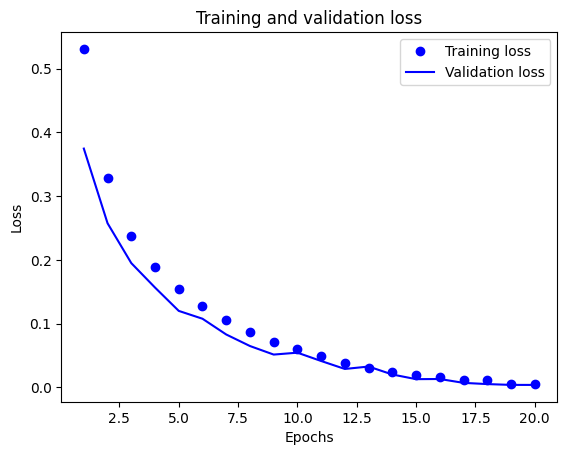

In [12]:
# 4.8 Plotting the training and validation set
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss") # "bo" is for "blue dot"
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # "b" is for "solid blue line"
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

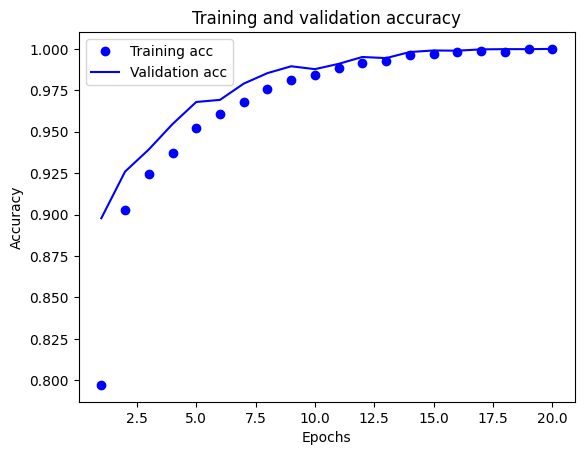

In [13]:
# 4.9 Plotting the training and validation accuracy
plt.clf() # clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [14]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 0s 494us/step - loss: 0.7919 - accuracy: 0.8465


[0.7918893098831177, 0.8465200066566467]

In [15]:
model.predict(x_test)

782/782 [==============================] - 0s 473us/step


array([[0.00371933],
       [1.        ],
       [0.9486501 ],
       ...,
       [0.00158265],
       [0.00337388],
       [0.652856  ]], dtype=float32)

In [16]:
# 4.10 Retraining a model from scratch
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)



Epoch 1/4
49/49 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.8111
Epoch 2/4
49/49 [==============================] - 0s 3ms/step - loss: 0.2607 - accuracy: 0.9115
Epoch 3/4
49/49 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.9284
Epoch 4/4
782/782 [==============================] - 0s 511us/step - loss: 0.3008 - accuracy: 0.8813


In [17]:
results

[0.30077701807022095, 0.8812800049781799]